<a href="https://colab.research.google.com/github/kzengg/Sales_Predictions/blob/main/Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

In [ ]:
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8UnIxVTcjavwAp17edXDP60JKPKAsargMRrGppvU-ryHrFL07sDfWadxEOKvUOcOVKgKhK5LmMrgo/pub?output=csv'
df = pd.read_csv(filename)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#Analysis Using Python

##Dataframe Information

In [ ]:
#Dataframe information
df.shape

(8523, 12)

8523 Rows and 12 Columns

In [ ]:
#data type
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##Cleaning Data

In [ ]:
#duplicate checks
df.duplicated().sum() #results show that there are no duplicates

0

###4. Identifying Missing Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#checking for Missing Values
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####Addressing Missing Values

####Addressing Missing Values in Item Weight

In [ ]:
#Checking to see what items are null values for weight
weightnull = pd.isnull(df["Item_Weight"])

nullweight = df[weightnull]

In [ ]:
nullweight.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362


In [ ]:
nullweight.groupby('Item_Type')['Item_Weight'].count()

Item_Type
Baking Goods             0
Breads                   0
Breakfast                0
Canned                   0
Dairy                    0
Frozen Foods             0
Fruits and Vegetables    0
Hard Drinks              0
Health and Hygiene       0
Household                0
Meat                     0
Others                   0
Seafood                  0
Snack Foods              0
Soft Drinks              0
Starchy Foods            0
Name: Item_Weight, dtype: int64

In [ ]:
#fill the null values based on the average of each item type. source: https://stackoverflow.com/questions/58484153/fill-missing-rows-in-a-python-pandas-dataframe-using-similar-rows
df['Item_Weight'] = df['Item_Weight'].fillna(df.groupby('Item_Type')['Item_Weight'].transform("mean"))

In [ ]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


####Addressing Missing Values in Outlet Size

In [ ]:
#Checking to see what outlet_size are null values
outletnull = pd.isnull(df["Outlet_Size"])

nulloutlet = df[outletnull]

In [ ]:
nulloutlet.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


In [ ]:
nulloutlet.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT010             Grocery Store      Tier 3                   339.351662
OUT017             Supermarket Type1  Tier 2                  2340.675263
OUT045             Supermarket Type1  Tier 2                  2192.384798
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
nulloutlet.groupby('Outlet_Identifier')['Outlet_Type'].count()

Outlet_Identifier
OUT010    555
OUT017    926
OUT045    929
Name: Outlet_Type, dtype: int64

In [ ]:
df.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Identifier  Outlet_Size  Outlet_Type        Outlet_Location_Type
OUT013             High         Supermarket Type1  Tier 3                  2298.995256
OUT018             Medium       Supermarket Type2  Tier 3                  1995.498739
OUT019             Small        Grocery Store      Tier 1                   340.329723
OUT027             Medium       Supermarket Type3  Tier 3                  3694.038558
OUT035             Small        Supermarket Type1  Tier 2                  2438.841866
OUT046             Small        Supermarket Type1  Tier 1                  2277.844267
OUT049             Medium       Supermarket Type1  Tier 1                  2348.354635
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
df.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].count()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT010             Grocery Store      Tier 3                    0
OUT013             Supermarket Type1  Tier 3                  932
OUT017             Supermarket Type1  Tier 2                    0
OUT018             Supermarket Type2  Tier 3                  928
OUT019             Grocery Store      Tier 1                  528
OUT027             Supermarket Type3  Tier 3                  935
OUT035             Supermarket Type1  Tier 2                  930
OUT045             Supermarket Type1  Tier 2                    0
OUT046             Supermarket Type1  Tier 1                  930
OUT049             Supermarket Type1  Tier 1                  930
Name: Outlet_Size, dtype: int64

In [ ]:
df.groupby(['Outlet_Identifier','Outlet_Type','Outlet_Location_Type'])['Item_Type'].count()

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT010             Grocery Store      Tier 3                  555
OUT013             Supermarket Type1  Tier 3                  932
OUT017             Supermarket Type1  Tier 2                  926
OUT018             Supermarket Type2  Tier 3                  928
OUT019             Grocery Store      Tier 1                  528
OUT027             Supermarket Type3  Tier 3                  935
OUT035             Supermarket Type1  Tier 2                  930
OUT045             Supermarket Type1  Tier 2                  929
OUT046             Supermarket Type1  Tier 1                  930
OUT049             Supermarket Type1  Tier 1                  930
Name: Item_Type, dtype: int64

In [ ]:
#updating null values: Source: https://stackoverflow.com/questions/52854011/fill-missing-value-base-on-other-columns-pandas
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Identifier'].map({'OUT010':'Small', 'OUT017':'High', 'OUT045':'High'}))

In [ ]:
df.groupby(['Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type'])['Item_Outlet_Sales'].mean()

Outlet_Identifier  Outlet_Size  Outlet_Type        Outlet_Location_Type
OUT010             Small        Grocery Store      Tier 3                   339.351662
OUT013             High         Supermarket Type1  Tier 3                  2298.995256
OUT017             High         Supermarket Type1  Tier 2                  2340.675263
OUT018             Medium       Supermarket Type2  Tier 3                  1995.498739
OUT019             Small        Grocery Store      Tier 1                   340.329723
OUT027             Medium       Supermarket Type3  Tier 3                  3694.038558
OUT035             Small        Supermarket Type1  Tier 2                  2438.841866
OUT045             High         Supermarket Type1  Tier 2                  2192.384798
OUT046             Small        Supermarket Type1  Tier 1                  2277.844267
OUT049             Medium       Supermarket Type1  Tier 1                  2348.354635
Name: Item_Outlet_Sales, dtype: float64

I decided to assigned Small to Outlet ID 10 because it is a Grocery Store which has a matching mean sales to Outlet ID 19

I then Assigned High to Outlet ID 17 and 45 because it balances out the data distribution where we have 3 high 3 medium and 3 small. I don't think this column will have a high impact on our future analysis since mean sales value and number of Items type sold are consistent across all 3.

####Confirming No Missing Values

In [ ]:
#checking for Missing Values
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

###Fixing Inconsistent Data e.g. cat vs Cat vs Cats

In [ ]:
df.nunique()

Item_Identifier              1559
Item_Weight                   431
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#Checks
#df['Item_Fat_Content'].value_counts()
#df['Item_Type'].value_counts()
#df['Outlet_Location_Type'].value_counts()
#df['Outlet_Type'].value_counts()
#df['Outlet_Size'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
#Updates
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')

Not all columns needs a consistency check. Mainly the object type ones that categorizes the data and are not expected to have unique values. e.g. Outlet_type

##Statistic Summary of Columns

In [ ]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.87,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


##Data Viz - High Level Observations

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Small,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


##Histogram

In [ ]:
#df['Item_Fat_Content'].value_counts()
#df['Item_Type'].value_counts()
#df['Outlet_Location_Type'].value_counts()
#df['Outlet_Type'].value_counts()
#df['Outlet_Size'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Text(0.5, 1.0, 'Items Visibility by Outlet Size')

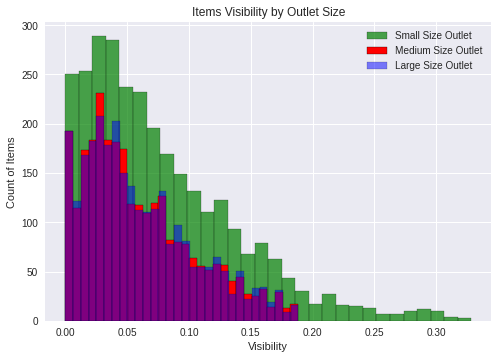

In [ ]:
plt.style.use('seaborn')
small_size = df.loc[:,'Outlet_Size'] == 'Small'
medium_size = df.loc[:,'Outlet_Size'] == 'Medium'
large_size = df.loc[:,'Outlet_Size'] == 'Large'
df.loc[small_size,'Item_Visibility'].hist(bins = 30,edgecolor='black',color = 'green',alpha = .7)
df.loc[medium_size,'Item_Visibility'].hist(bins = 30,edgecolor='black',color = 'red',alpha = 1)
df.loc[large_size,'Item_Visibility'].hist(bins = 30,edgecolor='black',color = 'blue',alpha = .5)

plt.legend(['Small Size Outlet', 'Medium Size Outlet' , 'Large Size Outlet']) 
plt.xlabel('Visibility')
plt.ylabel('Count of Items')
plt.title('Items Visibility by Outlet Size')

All outlets regardless of size, appears to have the same distribution of item visibility.

Text(0.5, 1.0, '# Item by Weight by Outlet Size')

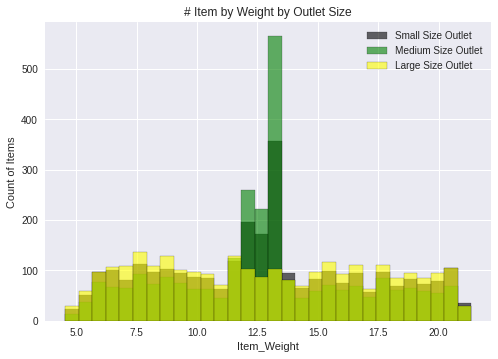

In [ ]:
plt.style.use('seaborn')
small_size = df.loc[:,'Outlet_Size'] == 'Small'
medium_size = df.loc[:,'Outlet_Size'] == 'Medium'
large_size = df.loc[:,'Outlet_Size'] == 'Large'
df.loc[small_size,'Item_Weight'].hist(bins = 30,edgecolor='black',color = 'black',alpha = .6)
df.loc[medium_size,'Item_Weight'].hist(bins = 30,edgecolor='black',color = 'green',alpha = .6)
df.loc[large_size,'Item_Weight'].hist(bins = 30,edgecolor='black',color = 'yellow',alpha = .6)

plt.legend(['Small Size Outlet', 'Medium Size Outlet' , 'Large Size Outlet']) 
plt.xlabel('Item_Weight')
plt.ylabel('Count of Items')
plt.title('# Item by Weight by Outlet Size')

Large size outlets appears to have an even distribution of all items (light to heavy)

Medium and Small size outlets have a concentration of items that weight between 10 and 15

##Boxplot

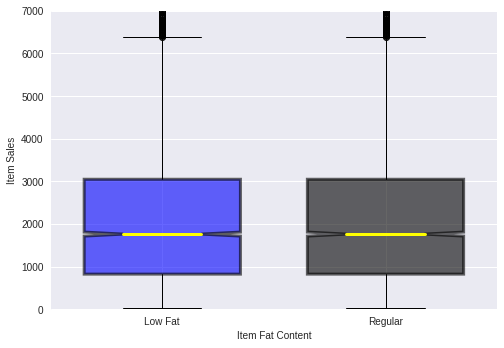

In [ ]:
low_fat = df.loc[:,'Item_Fat_Content'] == 'Low Fat'
regular = df.loc[:,'Item_Fat_Content'] == 'Regular'

lf = df.loc[low_fat,'Item_Outlet_Sales']
rf = df.loc[low_fat,'Item_Outlet_Sales']

fig, axes = plt.subplots(nrows = 1, ncols = 1)
boxplots = axes.boxplot([lf,rf],notch = True, labels=['Low Fat', 'Regular'],
                        widths = .7,
                        patch_artist=True,
                        medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                        boxprops = dict(linestyle='-', linewidth=3, color='Black', facecolor = 'black', alpha = .6)
                        );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('Blue')
plt.xlabel('Item Fat Content', fontsize = 10);
plt.ylabel('Item Sales', fontsize = 10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.axis([None, None, -10, 7000]); #none is set for x axis min max

#Source: https://pythonguides.com/matplotlib-set-y-axis-range/#:~:text=To%20plot%20the%20boxplot%2C%20use,plot%2C%20use%20plot()%20function.

Item Fat content appears to have no impact on item sales. The median item sales do not differ.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


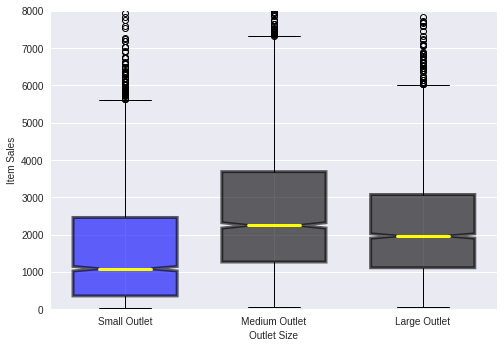

In [ ]:
small_size = df.loc[:,'Outlet_Size'] == 'Small'
medium_size = df.loc[:,'Outlet_Size'] == 'Medium'
large_size = df.loc[:,'Outlet_Size'] == 'Large'

small = df.loc[small_size,'Item_Outlet_Sales']
medium = df.loc[medium_size,'Item_Outlet_Sales']
large = df.loc[large_size,'Item_Outlet_Sales']

fig, axes = plt.subplots(nrows = 1, ncols = 1)
boxplots = axes.boxplot([small,medium,large],notch = True, labels=['Small Outlet', 'Medium Outlet', 'Large Outlet'],
                        widths = .7,
                        patch_artist=True,
                        medianprops = dict(linestyle='-', linewidth=3, color='Yellow'),
                        boxprops = dict(linestyle='-', linewidth=3, color='Black', facecolor = 'black', alpha = .6)
                        );

boxplot1 = boxplots['boxes'][0]
boxplot1.set_facecolor('Blue')
plt.xlabel('Outlet Size', fontsize = 10);
plt.ylabel('Item Sales', fontsize = 10);
plt.xticks(fontsize = 10);
plt.yticks(fontsize = 10);
plt.axis([None, None, -10, 8000]); #none is set for x axis min max

#Source: https://pythonguides.com/matplotlib-set-y-axis-range/#:~:text=To%20plot%20the%20boxplot%2C%20use,plot%2C%20use%20plot()%20function.

Medium outlet size has the highest average item sales follow by large outlet and small outlet size with the lowest average item sales. 

##Heatmap

In [ ]:
corr = df.corr()

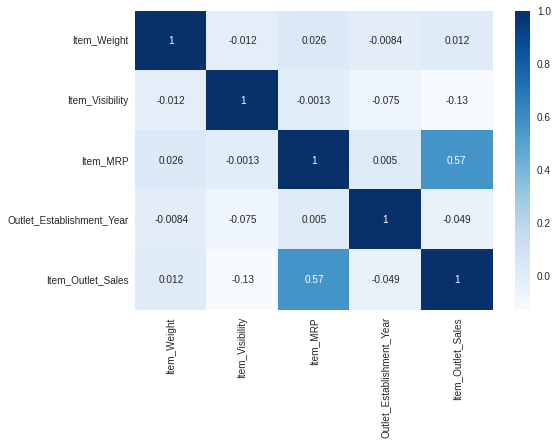

In [ ]:
sns.heatmap(corr,cmap = 'Blues', annot = True)

Observations:
* There is a high correlation between Item MRP and Item Sales which is expected 
as Items with higher MRP tend to have higher price. 
* There is no correlation between how long an outlet has been established to sales.
* There appears to have no correlation between item_visibility and item sales. The data might suggest that shoppers don't window shop at grocery outlets. Shoppers shop with a list of items they know they want to buy.

##Additional Visuals: Trends

In [ ]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
107,FDG12,6.635,Regular,0.000000,Baking Goods,121.3098,OUT045,2002,Large,Tier 2,Supermarket Type1,2530.7058
3400,FDE11,17.700,Regular,0.000000,Starchy Foods,183.5924,OUT035,2004,Small,Tier 2,Supermarket Type1,7033.5112
1388,FDW19,12.350,Regular,0.038718,Fruits and Vegetables,110.6570,OUT017,2007,Large,Tier 2,Supermarket Type1,2087.2830
812,FDO13,7.865,Low Fat,0.061009,Breakfast,166.0526,OUT013,1987,Large,Tier 3,Supermarket Type1,3617.9572
5689,NCO18,13.150,Low Fat,0.024791,Household,177.5686,OUT017,2007,Large,Tier 2,Supermarket Type1,3910.9092


In [ ]:
sales_by_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].mean()
sales_by_Size = df.groupby('Outlet_Size')['Item_Outlet_Sales'].mean()

sales_by_item_type

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

Text(0.5, 1.0, 'Average Sales by Item Type')

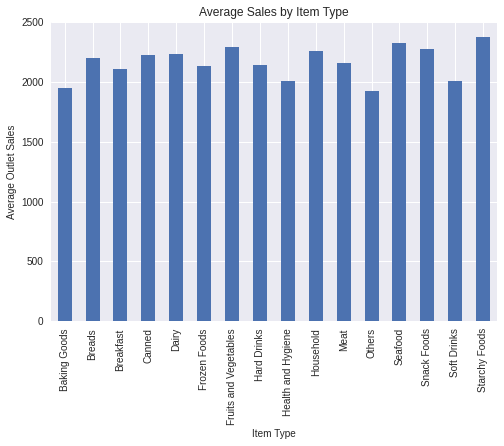

In [ ]:
plt.style.use('seaborn')
sales_by_item_type.plot(kind='bar', y = 'Item_type', x = 'Item_Outlet_Sales')

plt.ylim((0,2500))
plt.ylabel('Average Outlet Sales', fontsize = 10)
plt.xlabel('Item Type', fontsize = 10)
plt.title('Average Sales by Item Type')

While all food type had similar sales average, Starchy Foods had the highest average sales.

Text(0.5, 1.0, 'Average Sales by Outlet Size')

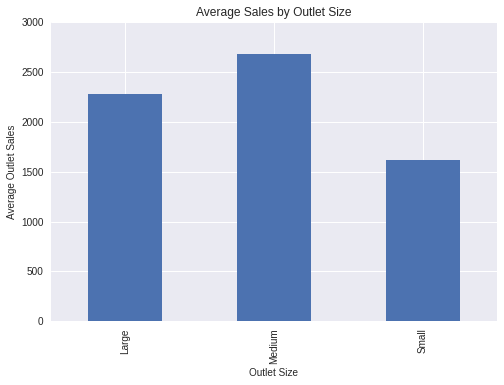

In [ ]:
plt.style.use('seaborn')
sales_by_Size.plot(kind='bar', y = 'Outlet_Size', x = 'Item_Outlet_Sales')

plt.ylim((0,3000))
plt.ylabel('Average Outlet Sales', fontsize = 10)
plt.xlabel('Outlet Size', fontsize = 10)
plt.title('Average Sales by Outlet Size')

Medium Size Oulets generated more sales on average than Large and Small Size Outlets

#Machine Learning

##Preprocessing

In [1]:
# imports
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Import the data
filename = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ8UnIxVTcjavwAp17edXDP60JKPKAsargMRrGppvU-ryHrFL07sDfWadxEOKvUOcOVKgKhK5LmMrgo/pub?output=csv'
df_ml = pd.read_csv(filename)
df_ml.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#Fixing Inconsistent Labeling
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('LF','Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('low fat', 'Low Fat')
df_ml['Item_Fat_Content'] = df_ml['Item_Fat_Content'].replace('reg', 'Regular')
df_ml['Outlet_Size'] = df_ml['Outlet_Size'].replace('High', 'Large')

In [ ]:
#Checks
print(df_ml['Item_Fat_Content'].value_counts())
print('\n')
print(df_ml['Item_Type'].value_counts())
print('\n')
print(df_ml['Outlet_Location_Type'].value_counts())
print('\n')
print(df_ml['Outlet_Type'].value_counts())
print('\n')
print(df_ml['Outlet_Size'].value_counts())

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64


In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
#check for dups
df_ml.duplicated().sum()

0

In [5]:
# Split
X = df_ml.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1)
y = df_ml['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

**Identifying each feature**

In [7]:
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

* Name: Nominal
* Manufacturer: Nominal
* Type: Nominal

In [8]:
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP']

The above are all Numeric Features

In [9]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')
# Scaler
scaler = StandardScaler()
# One-hot encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [10]:
# Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [11]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [12]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f850a9e1a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f850a9e1ad0>

In [13]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f850a9e1a90>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f850a9e1ad0>

In [14]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [15]:
#Showing Results
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed



0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 31)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])

##Linear Regression Model

In [16]:
# instantiate a linear regression model
scaler = StandardScaler()
lin_reg = LinearRegression()
# combine the preprocessor object and the linear regression model in a pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
# fit your pipe on the training data
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f850a9e1a90>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncode

In [17]:
# find MAE, MSE, RMSE and R2 on the linear regression model for both the train and test data
train_pred2 = lin_reg_pipe.predict(X_train)
test_pred2 = lin_reg_pipe.predict(X_test)

In [23]:
def eval_regression(true, pred):
  """Takes true and predicted values (arrays) and prints MAE, MSE, RMSE and R2"""
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'RMSE: {rmse},\n R^2: {r2} ')

In [24]:
eval_regression(y_train, train_pred2)

RMSE: 1140.3242079947659,
 R^2: 0.5606153870287736 


In [25]:
eval_regression(y_test, test_pred2)

RMSE: 1094.7569667716948,
 R^2: 0.5656025072798097 


The model performance between train and test data is doing well. 

Observation from R2 indicates that the model accounts for about 56% of the variation in both y test and y train using the features in test and train.

Observation from RMSE indicates that our prediction are off by roughly $1,000.



##Regression Tree

In [26]:
#instance of the Model

dec_tree = DecisionTreeRegressor(random_state = 42)

In [28]:
#Fit the Model (model is learning the relationship between features and target)

dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [30]:
#Predict the target values for the training set and test set

train_pred_dt = dec_tree.predict(X_train_processed)
test_pred_dt = dec_tree.predict(X_test_processed)

In [31]:
#Step 5: Evaluate Model

train_score_dt = dec_tree.score(X_train_processed, y_train)
test_score_dt = dec_tree.score(X_test_processed, y_test)
print(train_score_dt)
print(test_score_dt)

1.0
0.11426093831941997


In [32]:
#depth of our default tree?
dec_tree.get_depth()


42

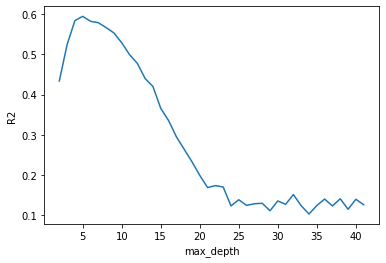

In [34]:
# List of values to try for max_depth:
depths = list(range(2, 42)) 
# Data frame to store the score for each value of max_depth:
scores_dt = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score_dt = dec_tree.score(X_train_processed, y_train)
    test_score_dt = dec_tree.score(X_test_processed, y_test)
    scores_dt.loc[depth, 'Train Score'] = train_score_dt
    scores_dt.loc[depth, 'Test Score'] = test_score_dt

  
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, scores_dt['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [35]:
#confirming
sorted_scores = scores_dt.sort_values(by='Test Score', ascending=False)
sorted_scores.head()


,Test Score,Train Score
5,0.59471,0.60394
4,0.584005,0.582625
6,0.582408,0.615072
7,0.578864,0.626453
8,0.566687,0.642724


In [40]:
# runing model with optimized value for max_depth
best_depth_estimators = scores_dt.index[0] # or 5

dec_tree_tuned = DecisionTreeRegressor(max_depth = best_depth_estimators, random_state = 42)
dec_tree_tuned.fit(X_train_processed, y_train)
train_dt_score = dec_tree.score(X_train_processed, y_train)
test_dt_score = dec_tree.score(X_test_processed, y_test)
print(f'R2: {train_dt_score}')
print(f'R2: {test_dt_score}')
print(f'\n')
print(f'RMSE: {np.sqrt(train_dt_score)}')
print(f'RMSE: {np.sqrt(test_dt_score)}')

R2: 0.9999996587482324
R2: 0.1259003197028321


RMSE: 0.9999998293741016
RMSE: 0.3548243504930744


Current data set is creating an overfitting model where the training data is performing better than testing. Ideally, we would want training and testing to have a small variance in R2 and RMSE value.

##Which Model?

Between the two model above, I would choose the Linear Regression Model. The main driver for this decision is because the variance between the train and test data for R2 and RMSE is too great under the Regression Tree model. Whereas in the Linear Regression Model, both testing and training yielded similar results. Additionally, the R2 score is much higher for test data when compared to Decision Tree model.